In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.stats import shapiro, normaltest, anderson
from scipy.stats import pearsonr, spearmanr, kendalltau
 
np.random.seed(42)  # kad rezultatai būtų atkartojami
 

In [2]:
n = 500
 
x_normal = np.random.normal(loc=0, scale=1, size=n)
x_lognormal = np.random.lognormal(mean=0.0, sigma=0.6, size=n)
 
x_outliers = x_normal.copy()
x_outliers[:5] = x_outliers[:5] + 8  # 5 didelės išskirtys
 
df = pd.DataFrame({
    "x_normal": x_normal,
    "x_lognormal": x_lognormal,
    "x_outliers": x_outliers
})
 
df.head()
 

,x_normal,x_lognormal,x_outliers
0,0.496714,1.743172,8.496714
1,-0.138264,3.144485,7.861736
2,0.647689,0.432082,8.647689
3,1.523030,1.401834,9.523030
4,-0.234153,0.676796,7.765847


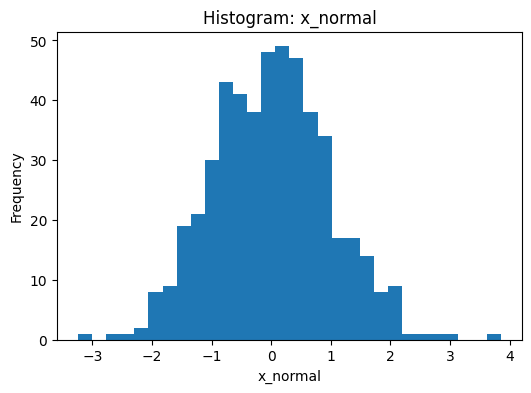

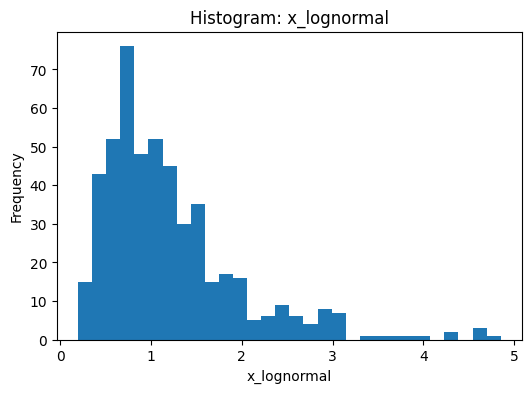

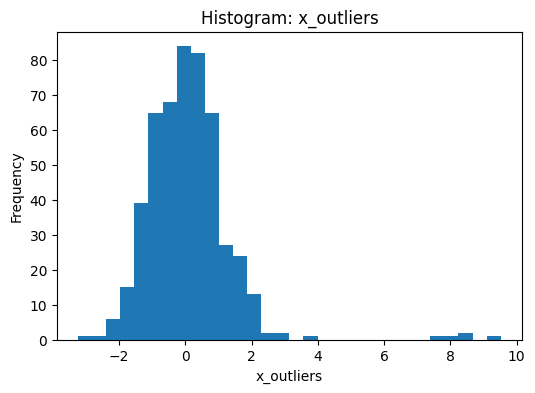

In [3]:
cols = ["x_normal", "x_lognormal", "x_outliers"]
 
for col in cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
 

In [4]:
def run_shapiro(series, name):
    stat, p = shapiro(series)
    print(f"{name}: W={stat:.4f}, p-value={p:.3e}")
 
for col in cols:
    run_shapiro(df[col], col)

x_normal: W=0.9967, p-value=4.013e-01
x_lognormal: W=0.8489, p-value=1.818e-21
x_outliers: W=0.8125, p-value=1.108e-23


In [5]:
def run_normaltest(series, name):
    stat, p = normaltest(series)
    print(f"{name}: stat={stat:.4f}, p-value={p:.3e}")
 
for col in cols:
    run_normaltest(df[col], col)

x_normal: stat=4.2235, p-value=1.210e-01
x_lognormal: stat=186.8058, p-value=2.727e-41
x_outliers: stat=344.8469, p-value=1.311e-75
